## Exploratory Data Analysis - EDA

This notebook reads in data created by INPUT_NN.ipynb and performs integrity checks as well as some
simple exploration prior to building a Neural Network.

Two files are read in - the first are inputs which contain London and Tokyo index data
as inputs.  The Nasdaq data is used as the target data.

From INPUT_NN we know that the first two columns of nn_inputs correspond with LONDON exchange data.
First Column is price change. Second Column is Trade Volume change

Third and fourth correspond to TOKYO exchange data.
Similarly, 3rd column is price change. 4th Column is the associated Trade Volume Change.

Target contains only one data type -price change (it is the only thing we're predicting)

In [3]:
%autosave 0  
import os
print(os.getcwd()) 

from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)


Autosave disabled
C:\REPOS\playground_local_files\notebooks


In [25]:
# read output from INPUT_NN.ipynb

inputs=np.load("nn_inputs" + '.npy')

num_input_samples =inputs.shape[0]
print("Number of samples in the input: %d" % num_input_samples)

num_inputAttributes=inputs.shape[1]
print("Number of Attributes in the input: %d" % num_inputAttributes)
print("===========================")

'''
for row in inputs:
    print(row)
''';

targets=np.load("nn_targets" + '.npy')
num_target_samples = targets.shape[0]
print("Number of Samples in the Target file:  %d" % num_target_samples)

print("Note the shape of the target - it's a vector:")
print(targets.shape)

#print(targets)

if num_target_samples != num_input_samples:
    print("ERROR:  Number of input samples MUST equal the number of target samples to run the Neural Network! ")

Number of samples in the input: 1088
Number of Attributes in the input: 4
Number of Samples in the Target file:  1088
Note the shape of the target - it's a vector:
(1088,)


In [ ]:
plt.hist(df_zip['price'], bins=20)
plt.show()

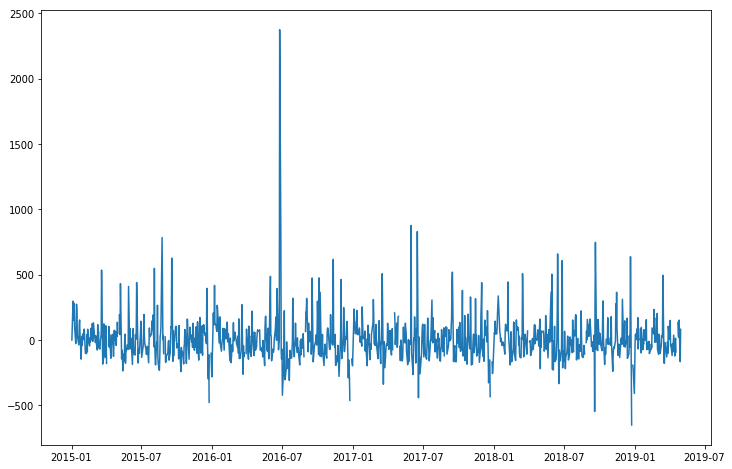

In [58]:
if include_volume:
    Symbol=INPUTS[0]
    test_volume_change= ('Vol_change_%s' % Symbol['label'])

    plt.plot(df_nn[test_volume_change])
    plt.show()

In [59]:
# Print info on the dataframe
df_nn.info()

# Fill in missing input data as 0s
df_nn.fillna(value=0, inplace=True)
df_nn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1088 entries, 2015-01-02 to 2019-04-30
Data columns (total 5 columns):
Change_LONDON         1071 non-null float64
Vol_change_LONDON     1071 non-null float64
Change_TOKYO          1024 non-null float64
Vol_change_TOKYO      1024 non-null float64
Target_change_NSDQ    1088 non-null float64
dtypes: float64(5)
memory usage: 51.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1088 entries, 2015-01-02 to 2019-04-30
Data columns (total 5 columns):
Change_LONDON         1088 non-null float64
Vol_change_LONDON     1088 non-null float64
Change_TOKYO          1088 non-null float64
Vol_change_TOKYO      1088 non-null float64
Target_change_NSDQ    1088 non-null float64
dtypes: float64(5)
memory usage: 51.0 KB


In [62]:
print(df_nn.columns)

Index(['Change_LONDON', 'Vol_change_LONDON', 'Change_TOKYO',
       'Vol_change_TOKYO', 'Target_change_NSDQ'],
      dtype='object')


Now we're ready to convert our Dataframes into numpy arrays (matrices) and then plug them in a neural net.

In [63]:
targets = df_nn[target_priceChange].values
print("targets type is:  ", type(targets) )
print(targets.shape)

targets type is:   <class 'numpy.ndarray'>
(1088,)


In [64]:
if target_priceChange in df_nn.columns:
    df_nn.drop(target_priceChange, axis=1, inplace=True)
    
inputs = df_nn.values
print(inputs.shape)
print(inputs[0:5])

(1088, 4)
[[-2.80000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.00000000e+00  2.97272000e+02 -2.40000000e-01  0.00000000e+00]
 [-7.90000000e-01  2.72009600e+02 -3.02000000e+00  3.96480000e-02]
 [ 8.40000000e-01  1.50599680e+02  1.00000000e-02  9.75840000e-03]
 [ 2.34000000e+00  2.80911744e+02  1.67000000e+00  9.43872000e-03]]


In [66]:
# Write them out...then read them back in to be sure.

print("Writing out the following INPUT array:  %s" % str(inputs.shape) )
np.save("nn_inputs", inputs)
del inputs
inputs=np.load("nn_inputs" + '.npy')
print("Read Back:  %s" % str(inputs.shape) )

print("Writing out the following TARGET array: %s"  % str(targets.shape))
np.save("nn_targets", targets)
del targets
targets=np.load("nn_targets" + '.npy')
print("Read Back:  %s" % str(targets.shape) )



Writing out the following INPUT array:  (1088, 4)
Read Back:  (1088, 4)
Writing out the following TARGET array: (1088,)
Read Back:  (1088,)


In [67]:
print("Done")

Done
